In [67]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from MyDatasetLoader import MyDatasetLoader

In [68]:
dataset=MyDatasetLoader(root='./cora')
train_y= dataset[0].y[dataset[0].train_mask]
test_y = dataset[0].y[dataset[0].test_mask]
train_x=dataset[0].x[dataset[0].train_mask]
test_x=dataset[0].x[dataset[0].test_mask]
dataset[0].labels_count

Processing...
Done!


{'Neural_Networks': 819,
 'Rule_Learning': 181,
 'Reinforcement_Learning': 218,
 'Probabilistic_Methods': 427,
 'Theory': 352,
 'Genetic_Algorithms': 419,
 'Case_Based': 299}

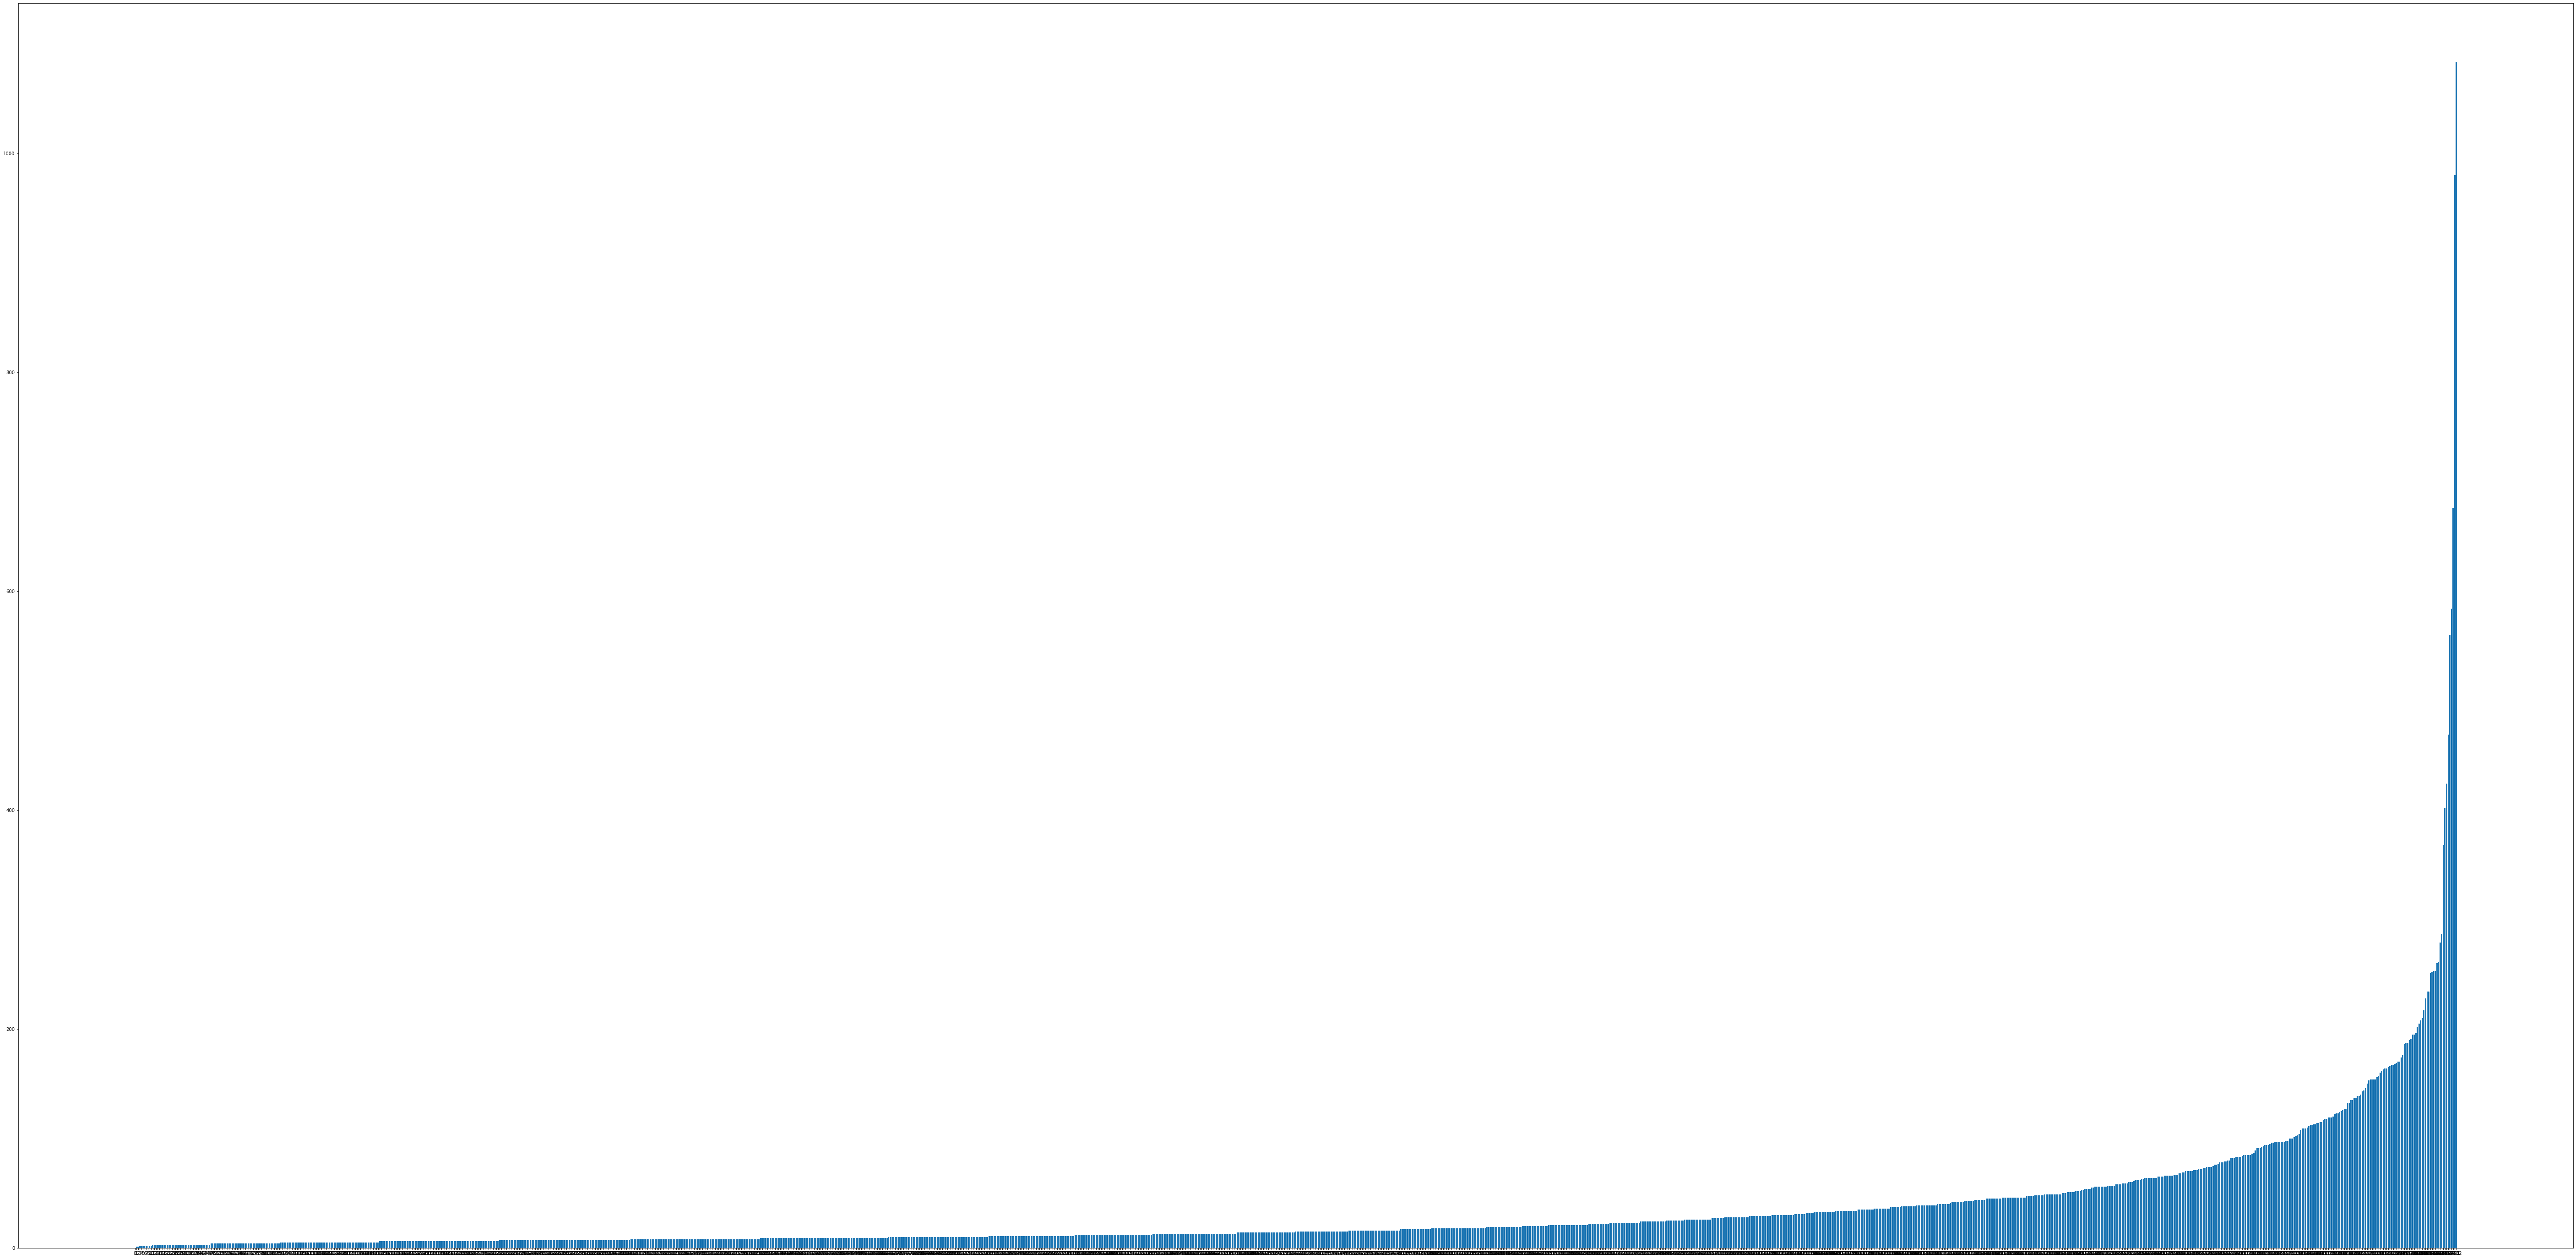

max:  1083.0
min:  0.0
avg:  34.34473133286811


In [69]:


word_count=dataset[0].word_count
plt.figure(figsize = (100, 50))
plt.bar(range(len(word_count)), sorted(list(word_count.values())), align='center')
plt.xticks(range(len(word_count)), list(word_count.keys()))
plt.show()
def avg(lst):
    return sum(lst) / len(lst)
print("max: ",max(list(word_count.values())))
print("min: ",min(list(word_count.values())))
print("avg: ",avg(list(word_count.values())))


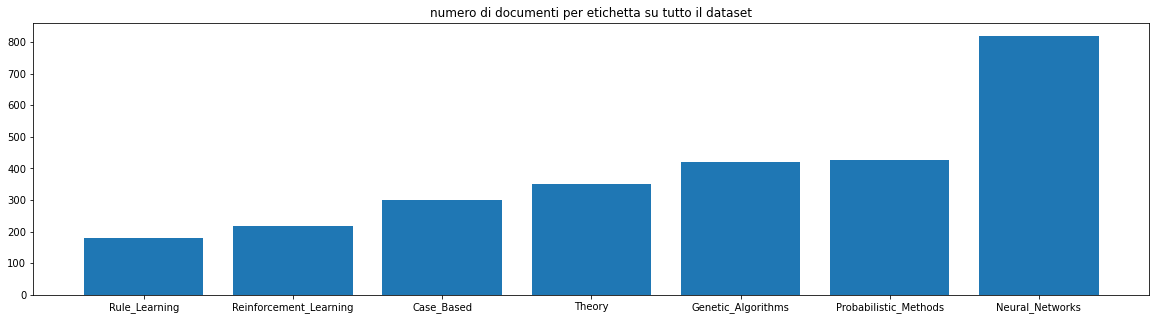

In [70]:
labels_count=dataset[0].labels_count
Z = [x for _,x in sorted(zip(list(labels_count.values()),list(labels_count.keys())))]
plt.figure(figsize = (20, 5))
plt.bar(range(len(labels_count)), sorted(list(labels_count.values())), align='center')
plt.xticks(range(len(labels_count)),Z)
plt.title('numero di documenti per etichetta su tutto il dataset')
plt.show()

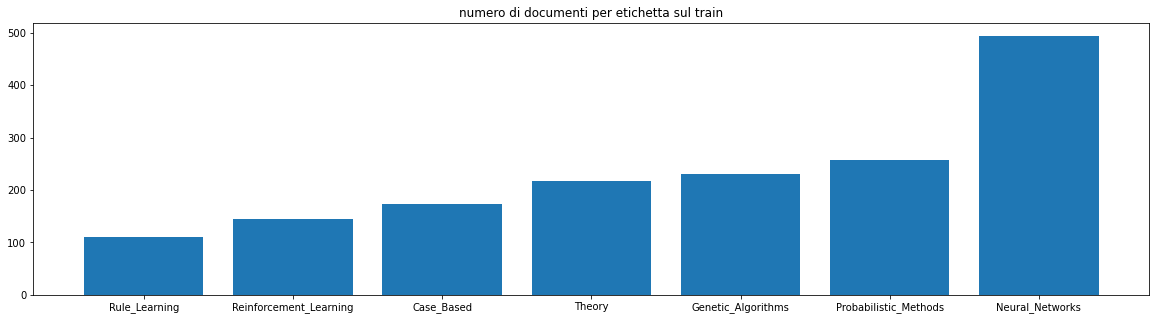

In [71]:

label_map=inv_map = {dataset.data.label_map[k] : k for k in dataset.data.label_map}
labels_count=dataset[0].labels_count
for x in labels_count.keys():
    labels_count[x]=0
for label in train_y:
    labels_count[label_map[int(label)]]+=1
Z = [x for _,x in sorted(zip(list(labels_count.values()),list(labels_count.keys())))]
plt.figure(figsize = (20, 5))
plt.bar(range(len(labels_count)), sorted(list(labels_count.values())), align='center')
plt.xticks(range(len(labels_count)),Z)
plt.title('numero di documenti per etichetta sul train')
plt.show()

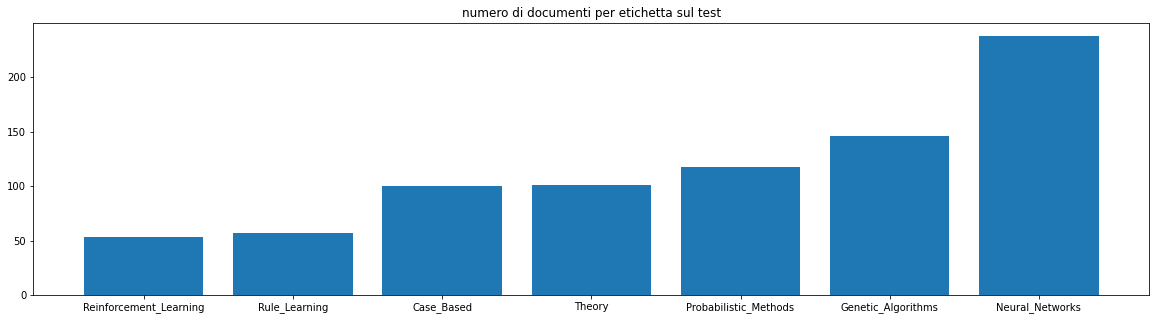

In [72]:
labels_count=dataset[0].labels_count
for x in labels_count.keys():
    labels_count[x]=0
for label in test_y:
    labels_count[label_map[int(label)]]+=1
Z = [x for _,x in sorted(zip(list(labels_count.values()),list(labels_count.keys())))]
plt.figure(figsize = (20, 5))
plt.bar(range(len(labels_count)), sorted(list(labels_count.values())), align='center')
plt.xticks(range(len(labels_count)),Z)
plt.title('numero di documenti per etichetta sul test')
plt.show()

C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


1625 1625 1625


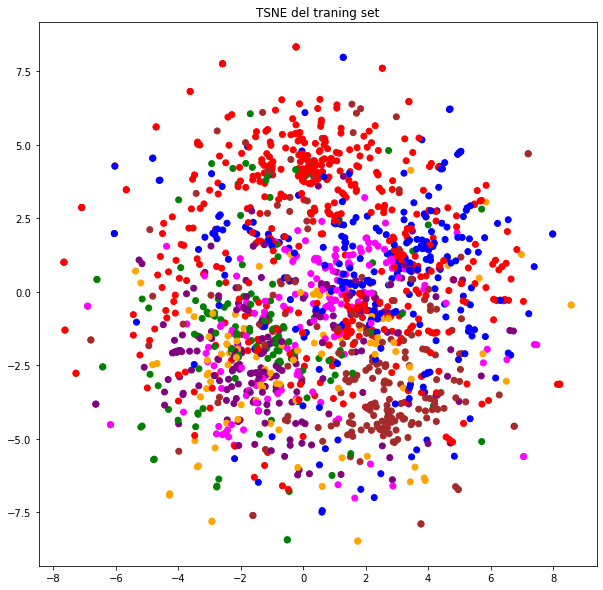

In [73]:
color_list = ["red", "orange", "green", "blue", "purple", "brown","fuchsia"]
embs=[]
colors = []

colors +=  [color_list[y] for y in train_y]

#embs = torch.cat(embs, dim=0)
#np.shape( embs.detach().numpy())
#pca = PCA(n_components=500)
#train_x = pca.fit_transform(train_x)

xs, ys = zip(*TSNE().fit_transform(train_x))
print(len(xs),len(ys),len(colors))
plt.figure(figsize = (10, 10))
plt.title("TSNE del traning set")
plt.scatter(xs, ys, color=colors)

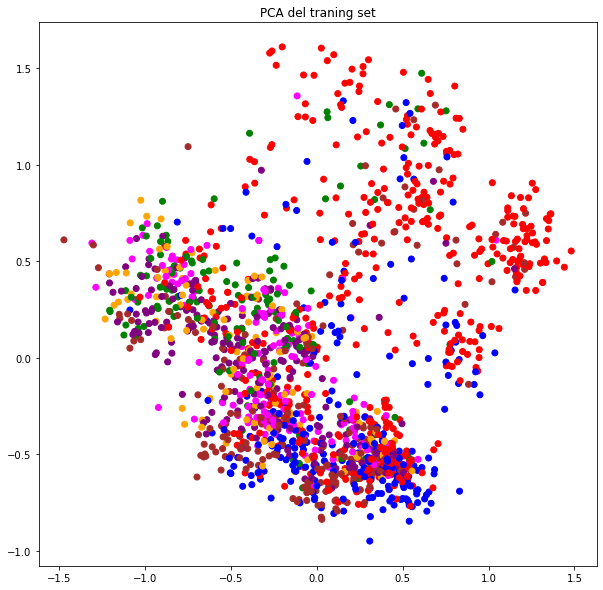

In [74]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_x)
xs,ys=zip(*principalComponents)
plt.figure(figsize = (10, 10))
plt.title("PCA del traning set")
plt.scatter(xs, ys, color=colors)

C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


813 813 813


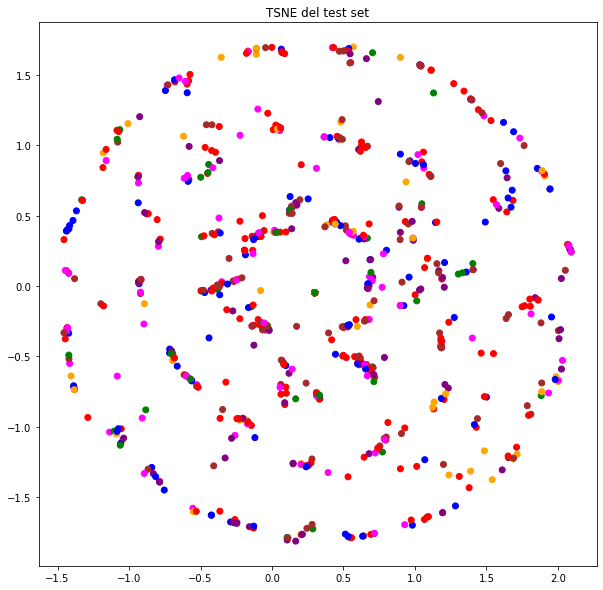

In [75]:
pca = PCA(n_components=500)
#test_x = pca.fit_transform(test_x)
colors=[]
colors +=  [color_list[y] for y in test_y]

xs, ys = zip(*TSNE().fit_transform(test_x))
print(len(xs),len(ys),len(colors))
plt.figure(figsize = (10, 10))
plt.title("TSNE del test set")
plt.scatter(xs, ys, color=colors)

813


C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\decomposition\_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


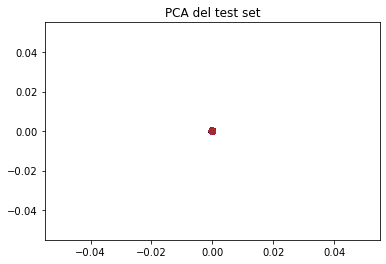

In [77]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(test_x)
print(len(principalComponents))
xs,ys=zip(*principalComponents)
#plt.figure(figsize = (40, 40))
plt.title("PCA del test set")
plt.scatter(xs, ys, color=colors)